In [1]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns
from sklearn.model_selection import train_test_split #to split the data into test and split
from sklearn.preprocessing import StandardScaler #to standardize variables
import statsmodels.api as sm

In [2]:
df1=pd.read_csv("E:\\Datasets\\kc_house_data.csv")
df1.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df1.shape

(21597, 21)

In [4]:
df1.info()
df1.isnull().values.any()
#We have no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

False

In [5]:
duplicate=df1[df1.duplicated('id')]
type(duplicate) #dataframe
duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [6]:
#duplicates dropped
df2=df1.drop(duplicate.index,axis=0)
type(df2)


pandas.core.frame.DataFrame

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  int64  
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [8]:
#ID is of no significance to our analysis hence we drop it
df2.drop('id',axis=1,inplace=True)
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
#Changing date format to extract year of being sold
df2['date']=pd.to_datetime(df2['date'])
#print(df2['date'])

#Extract year from date to calculate age of the house
df2['sold_yr']=df2['date'].dt.year
#print(df2['sold_yr'])

#Calculating age of the house
df2['age']=df2['sold_yr']-df2['yr_built']
df2.head()

#Drop the three variables
df2.drop(['date','yr_built'],axis=1,inplace=True)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_yr,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,2015,28


In [10]:
#Calculating age of houses since they were renovated
df2['renovate']=df2['sold_yr']-df2['yr_renovated']
df2.head()

for i in df2.index:
    if df2.loc[i,'renovate']>1000:
        df2.loc[i,'renovate']=df2.loc[i,'age']
df2.head()
df2.drop(['sold_yr','yr_renovated','age'],axis=1,inplace=True)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

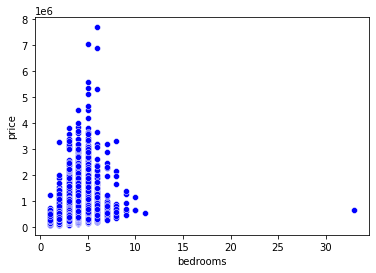

In [11]:
#Bedroom variable
sns.scatterplot(df2['bedrooms'],df2['price'],color='blue')

In [12]:
df2.loc[df2['bedrooms']>30] 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
15856,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,98103,47.6878,-122.331,1330,4700,67


In [13]:
demo=df2.loc[df2['bedrooms']==3]
demo.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
count,9.731000e+03,9731.0,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000
mean,4.665275e+05,3.0,1.970609,1807.596855,14441.603124,1.451547,0.006577,0.189189,3.416915,7.476724,1586.048813,221.548042,98076.408694,47.551767,-122.213119,1836.762409,12831.775049,40.272326
std,2.627927e+05,0.0,0.629174,622.858685,35748.759116,0.562662,0.080835,0.687183,0.640335,0.948709,573.451735,351.576550,53.685081,0.146341,0.144549,541.517949,27350.656983,26.656354
min,8.200000e+04,3.0,0.750000,490.000000,572.000000,1.000000,0.000000,0.000000,1.000000,4.000000,490.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000
25%,2.964875e+05,3.0,1.500000,1370.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98031.000000,47.444550,-122.331000,1450.000000,5000.000000,19.000000
50%,4.134500e+05,3.0,2.000000,1680.000000,7620.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1440.000000,0.000000,98059.000000,47.565700,-122.231000,1720.000000,7686.000000,37.000000
75%,5.600000e+05,3.0,2.500000,2110.000000,10362.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1840.000000,430.000000,98117.000000,47.680150,-122.124000,2130.000000,10000.000000,57.000000
max,3.800000e+06,3.0,4.500000,6400.000000,843309.000000,3.500000,1.000000,4.000000,5.000000,13.000000,5480.000000,2590.000000,98199.000000,47.777600,-121.315000,4950.000000,560617.000000,115.000000


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

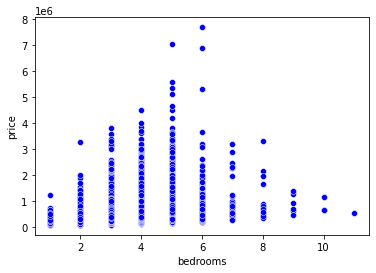

In [14]:
#Bedroom as 33 cannot be a typo since its price is much higher than bedroom 3 categories houses with nearly same features.
df2.drop(15856,axis=0,inplace=True)
sns.scatterplot(df2['bedrooms'],df2['price'],color='blue')

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

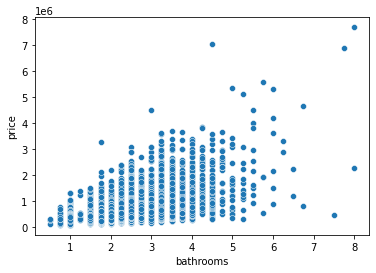

In [15]:
#Bathroom variable
sns.scatterplot(df2['bathrooms'],df2['price'])

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

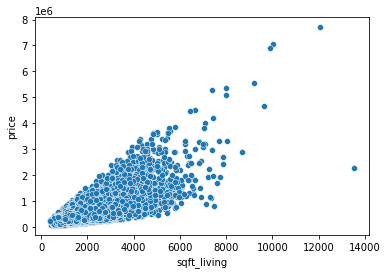

In [16]:
#sqft_living variable
sns.scatterplot(df2['sqft_living'],df2['price'])

In [17]:
df2.loc[df2['sqft_living']>12000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
7245,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,98102,47.6298,-122.323,3940,8800,27
12764,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,98053,47.6675,-121.986,4850,217800,15


In [18]:
demo=df2.loc[df2['bedrooms']==6]
demo.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
count,2.650000e+02,265.0,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.00000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,8.333442e+05,6.0,3.088679,3310.758491,18839.203774,1.609434,0.015094,0.558491,3.486792,8.113208,2510.086792,800.671698,98078.94717,47.579908,-122.239608,2296.860377,14937.879245,46.905660
std,8.082964e+05,0.0,1.057380,1297.039602,38521.376843,0.537694,0.122159,1.179598,0.680362,1.377035,1121.007148,677.595695,54.66417,0.119945,0.109497,812.913834,34530.065359,29.916971
min,1.750000e+05,6.0,1.000000,1370.000000,2370.000000,1.000000,0.000000,0.000000,1.000000,5.000000,900.000000,0.000000,98001.00000,47.187900,-122.408000,900.000000,1099.000000,0.000000
25%,4.350000e+05,6.0,2.500000,2540.000000,6015.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1680.000000,0.000000,98030.00000,47.521100,-122.324000,1720.000000,5450.000000,26.000000
50%,6.500000e+05,6.0,3.000000,2980.000000,8732.000000,2.000000,0.000000,0.000000,3.000000,8.000000,2350.000000,900.000000,98077.00000,47.602400,-122.269000,2120.000000,8240.000000,45.000000
75%,9.000000e+05,6.0,3.750000,3670.000000,14040.000000,2.000000,0.000000,0.000000,4.000000,9.000000,3050.000000,1270.000000,98118.00000,47.669000,-122.162000,2680.000000,11200.000000,60.000000
max,7.700000e+06,6.0,8.000000,12050.000000,248600.000000,3.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,3480.000000,98199.00000,47.773500,-121.869000,5790.000000,311610.000000,115.000000


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

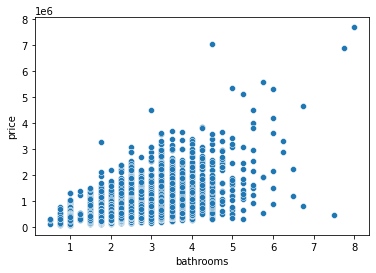

In [19]:
#drop idex 12764 because the price doesn't matches the trend plus it has an absurd sqft_lot data
df2.drop(12764,axis=0,inplace=True)
sns.scatterplot(df2['bathrooms'],df2['price'])

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
1717,700000.0,4,1.0,1300,1651359,1.0,0,3,4,6,1300,0,98022,47.2313,-122.023,2560,425581,95


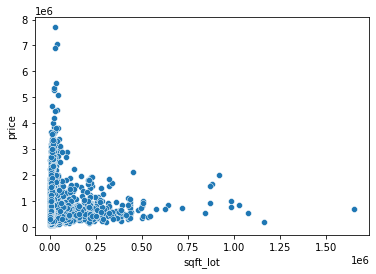

In [20]:
#sqft_lot variable
sns.scatterplot(df2['sqft_lot'], df2['price'])
#sns.boxplot(df2['sqft_lot'])
df2.loc[df2['sqft_lot']>1500000]

In [21]:
#dropping index 1717 because sqft_lot data seems absurd based on other features
df2.drop(1717,axis=0,inplace=True)

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='price'>

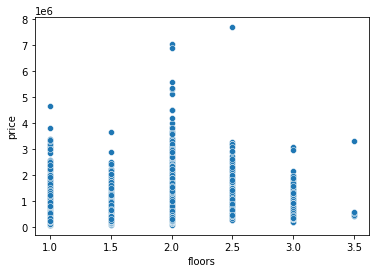

In [22]:

#floor variable
sns.scatterplot(df2['floors'], df2['price'])


<AxesSubplot:xlabel='floors'>

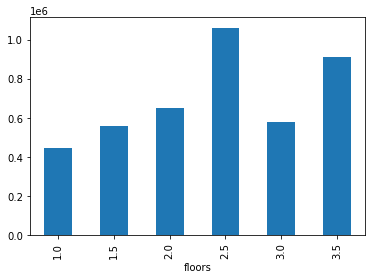

In [23]:
df2.groupby('floors')['price'].mean().plot.bar()
#factor of 0.5 in floor value is assumed to be due to availability of basement

<AxesSubplot:xlabel='waterfront'>

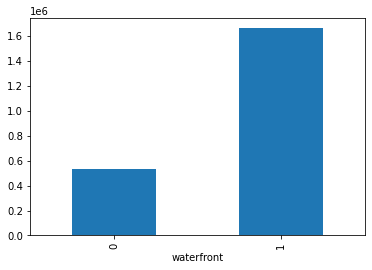

In [24]:
#waterfront
df2.groupby('waterfront').count()
df2.groupby('waterfront')['price'].mean().plot.bar()

In [25]:
demo=df2.loc[df2['waterfront']==0]
demo.describe()
demo=df2.loc[df2['waterfront']==1]
demo.describe()
#even though waterfront with 1 has less values compared to with 0 but it has affected the prizes hence we will keep it.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
count,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1.662524e+06,3.300613,2.677914,3173.687117,25371.828221,1.641104,1.0,3.766871,3.533742,8.773006,2473.042945,700.644172,98096.527607,47.537364,-122.281601,2666.349693,22385.104294,41.092025
std,1.120388e+06,1.078035,1.092456,1606.025093,42944.334119,0.554191,0.0,0.561859,0.739388,1.761385,1240.439072,792.919972,59.705586,0.115622,0.124015,823.243364,22589.013566,26.371704
min,2.850000e+05,1.000000,0.750000,440.000000,1767.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,2433.000000,0.000000
25%,7.600000e+05,3.000000,2.000000,2060.000000,10851.000000,1.000000,1.0,4.000000,3.000000,8.000000,1570.000000,0.000000,98040.000000,47.451200,-122.376500,2080.000000,11715.000000,21.000000
50%,1.400000e+06,3.000000,2.500000,2850.000000,17342.000000,2.000000,1.0,4.000000,3.000000,9.000000,2180.000000,500.000000,98075.000000,47.539500,-122.277000,2660.000000,15959.000000,34.000000
75%,2.215000e+06,4.000000,3.250000,3905.000000,26408.000000,2.000000,1.0,4.000000,4.000000,10.000000,3085.000000,1245.000000,98155.000000,47.606800,-122.210000,3140.000000,24765.000000,59.000000
max,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,4820.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000,111.000000


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='price'>

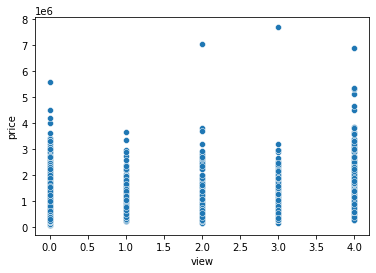

In [26]:
#view
sns.scatterplot(df2['view'], df2['price'])

<AxesSubplot:xlabel='view'>

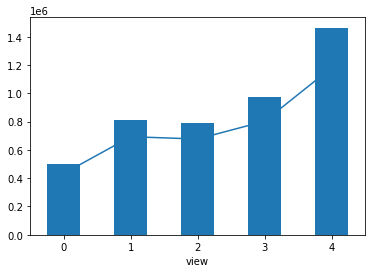

In [27]:
df2.groupby('view')['price'].mean().plot.bar()
df2.groupby('view')['price'].median().plot.line()

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='price'>

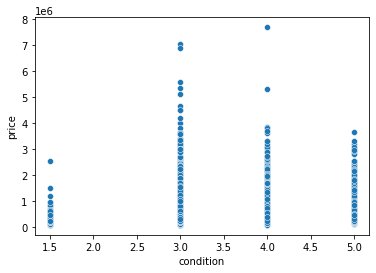

In [28]:
#condition
#sns.scatterplot(df2['condition'], df2['price'])

#Since houses of condition 1 and 2 are very less hence they have been grouped and denoted by 1.5
for i in df2.index:
    if df2.loc[i,'condition']==1 or df2.loc[i,'condition']==2:
        df2.loc[i,'condition']=1.5
sns.scatterplot(df2['condition'], df2['price'])

<AxesSubplot:xlabel='condition'>

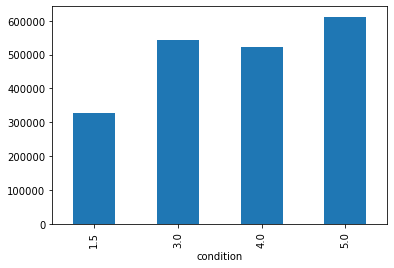

In [29]:
df2.groupby('condition')['price'].mean().plot.bar()
#df2.groupby('condition')['price'].median().plot.line()

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='price'>

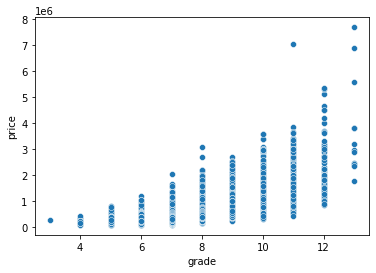

In [30]:
#grade
sns.scatterplot(df2['grade'], df2['price'])

<AxesSubplot:xlabel='grade'>

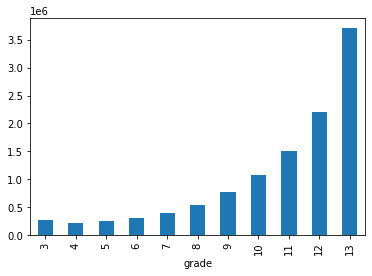

In [31]:
df2.groupby('grade')['price'].mean().plot.bar()

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

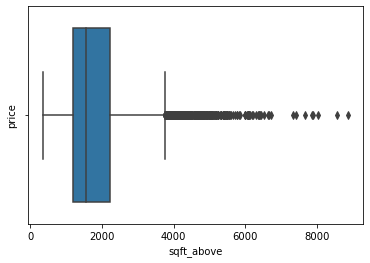

In [32]:
#sqft_above
sns.scatterplot(df2['sqft_above'], df2['price'])
sns.boxplot(df2['sqft_above'])

In [33]:
df2.loc[df2['sqft_above']>8000] #justified

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
7245,7700000.0,6,8.00,12050,27600,2.5,0,3,4.0,13,8570,3480,98102,47.6298,-122.323,3940,8800,27
9245,6890000.0,6,7.75,9890,31374,2.0,0,4,3.0,13,8860,1030,98039,47.6305,-122.240,4540,42730,13
18288,3300000.0,5,6.25,8020,21738,2.0,0,0,3.0,11,8020,0,98006,47.5675,-122.189,4160,18969,13


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

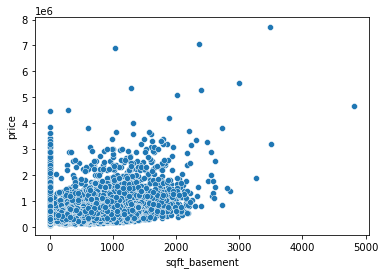

In [34]:
#sqft_basement
sns.scatterplot(df2['sqft_basement'], df2['price'])

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement'>

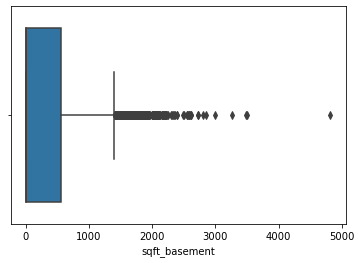

In [35]:
sns.boxplot(df2['sqft_basement'])

In [36]:
df2.loc[df2['sqft_basement']>4000]
df2.loc[df2['sqft_basement']>3000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
7245,7700000.0,6,8.00,12050,27600,2.5,0,3,4.0,13,8570,3480,98102,47.6298,-122.323,3940,8800,27
8085,4670000.0,5,6.75,9640,13068,1.0,1,4,3.0,12,4820,4820,98040,47.5570,-122.210,3270,10454,5
10074,1900000.0,5,4.25,6510,16471,2.0,0,3,4.0,11,3250,3260,98040,47.5758,-122.242,4480,16471,34
15468,3200000.0,4,3.25,7000,28206,1.0,1,4,4.0,12,3500,3500,98075,47.5928,-122.086,4913,14663,23


In [37]:
demo=df2[df2['bedrooms']==5]
demo.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
count,1.586000e+03,1586.0,1586.000000,1586.000000,1.586000e+03,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,7.882702e+05,5.0,2.782945,3054.823455,1.684593e+04,1.581652,0.011980,0.411728,3.449874,8.283102,2413.760404,641.063052,98069.898487,47.574070,-122.200556,2446.792560,13136.830391,37.283733
std,5.979010e+05,0.0,0.836317,1076.162436,4.265978e+04,0.492323,0.108829,0.993398,0.662785,1.339967,1057.641351,613.922999,53.518302,0.120338,0.123172,811.592744,20937.607116,29.127808
min,1.330000e+05,5.0,1.000000,1120.000000,1.989000e+03,1.000000,0.000000,0.000000,1.500000,5.000000,760.000000,0.000000,98001.000000,47.177600,-122.507000,460.000000,1209.000000,-1.000000
25%,4.382500e+05,5.0,2.250000,2320.000000,6.286500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,98028.000000,47.507150,-122.297750,1830.000000,6035.250000,11.000000
50%,6.200000e+05,5.0,2.750000,2870.000000,8.940000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2195.000000,705.000000,98056.000000,47.583000,-122.208000,2290.000000,8551.500000,36.000000
75%,9.150000e+05,5.0,3.250000,3557.500000,1.324850e+04,2.000000,0.000000,0.000000,4.000000,9.000000,3057.500000,1090.000000,98115.000000,47.664775,-122.124000,2940.000000,12000.000000,53.000000
max,7.060000e+06,5.0,6.750000,10040.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,98199.000000,47.777200,-121.718000,6110.000000,256803.000000,115.000000


In [38]:
#for index 8085, sqft_above and sqft_basement as exact same value plus sqft_basement exceeds the limit for 5 bedrooms houses
df2.drop(8085, axis=0,inplace=True)

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zipcode', ylabel='price'>

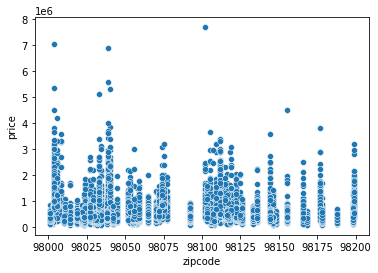

In [39]:
#zipcode
sns.scatterplot(df2['zipcode'], df2['price']) #no such conclusion

In [40]:
df2['zipcode'].nunique() 

70

<AxesSubplot:xlabel='zipcode'>

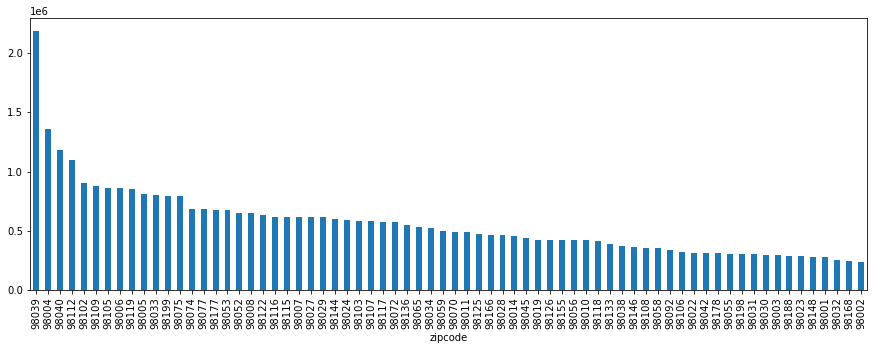

In [41]:
#plotting zipcodes according to mean price of each zipcode
plt.figure(figsize=[15,5])
df2.groupby('zipcode')['price'].mean().sort_values(ascending=False).plot.bar()

In [42]:
x=df2.groupby('zipcode')['price'].mean().sort_values(ascending=False)
print(x)

zipcode
98039    2.186224e+06
98004    1.355200e+06
98040    1.182507e+06
98112    1.096523e+06
98102    8.996077e+05
             ...     
98148    2.820498e+05
98001    2.813837e+05
98032    2.511958e+05
98168    2.413308e+05
98002    2.340839e+05
Name: price, Length: 70, dtype: float64


In [43]:
average=x[x.values<x.quantile(0.25)]
average
type(average)
average.count()
#average.index

18

In [44]:
good=x[x.values<x.quantile(0.50)]
good.drop(average.index,axis=0,inplace=True)
good.count()

17

In [45]:
posh=x[x.values<x.quantile(0.75)]
posh.drop(good.index,axis=0,inplace=True)
posh.drop(average.index,axis=0,inplace=True)
posh.index
posh.count()

17

In [46]:
very_posh=x[x.values>x.quantile(0.75)]
very_posh.count()


18

In [47]:
df2['zipcode']=df2['zipcode'].replace(average.index,"Average")

In [48]:
df2['zipcode']=df2['zipcode'].replace(good.index,"Good")

In [49]:
df2['zipcode']=df2['zipcode'].replace(posh.index,"Posh")

In [50]:
df2['zipcode']=df2['zipcode'].replace(very_posh.index,"Very Posh")

In [51]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovate
0,221900.0,3,1.00,1180,5650,1.0,0,0,3.0,7,1180,0,Average,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3.0,7,2170,400,Good,47.7210,-122.319,1690,7639,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3.0,6,770,0,Good,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5.0,7,1050,910,Posh,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3.0,8,1680,0,Very Posh,47.6168,-122.045,1800,7503,28


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lat', ylabel='price'>

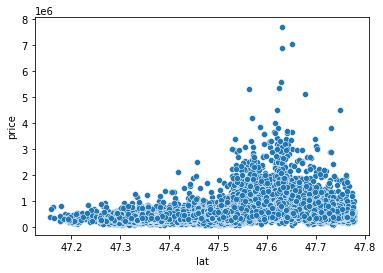

In [52]:
#lat and #long
sns.scatterplot(df2['lat'],df2['price'])

In [53]:
corr=df2['lat'].corr(df2['price'])
corr

0.30673735485587245

In [54]:
corr=df2['long'].corr(df2['price'])
corr

0.020669442675346466

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='price'>

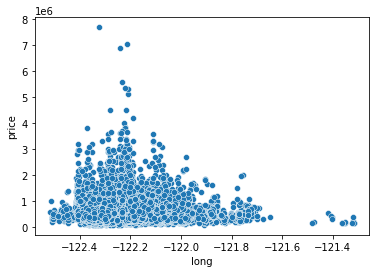

In [55]:
sns.scatterplot(df2['long'],df2['price'])

In [56]:
df2['lat']= 48 - df2['lat'] #to change origin 
df2['long']=df2['long']+123 

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='price'>

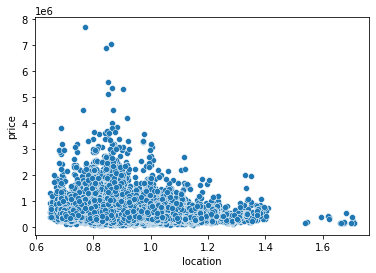

In [57]:
#making a new variable 'location' by combining the two variables as both are of same nature 
df2['location']=((df2['lat']**2)+(df2['long']**2))**(1/2)
sns.scatterplot(df2['location'],df2['price'])

In [58]:
df2.drop(['lat','long'],axis=1,inplace=True)
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'renovate',
       'location'],
      dtype='object')

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

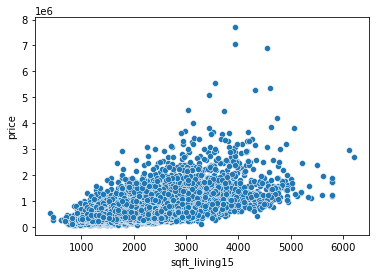

In [59]:
#sqft_living15
sns.scatterplot(df2['sqft_living15'],df2['price'])

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living15'>

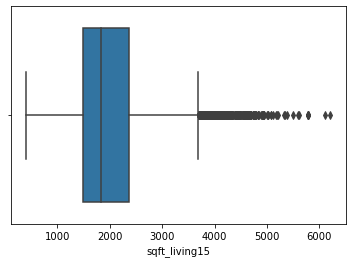

In [60]:
sns.boxplot(df2['sqft_living15'])

In [61]:
df2[df2['sqft_living15']>6000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,renovate,location
10362,2980000.0,5,5.5,7400,18898,2.0,0,3,3.0,13,6290,1110,Very Posh,6110,26442,13,0.998650
19842,2700000.0,4,4.0,7850,89651,2.0,0,0,3.0,12,7850,0,Posh,6210,95832,9,1.116858


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

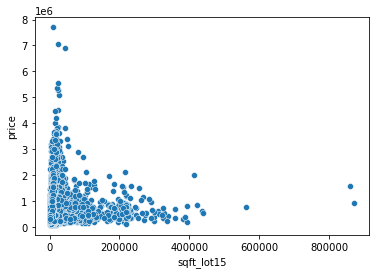

In [62]:
#sqft_lot15
sns.scatterplot(df2['sqft_lot15'],df2['price'])

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot15'>

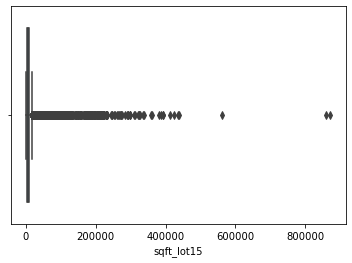

In [63]:
sns.boxplot(df2['sqft_lot15'])

In [64]:
df2[df2['sqft_lot15']>500000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,renovate,location
9705,937500.0,4,4.0,5545,871200,2.0,0,0,3.0,11,3605,1940,Good,3420,871200,12,1.164002
13451,790000.0,3,2.5,2640,432036,1.5,0,3,3.0,10,2640,0,Average,1500,560617,18,1.265905
20436,1600000.0,4,5.5,6530,871200,2.0,0,2,3.0,11,6530,0,Good,1280,858132,7,1.171230


In [65]:
#we have 9705, 13451, 20436 indexes as outliers but since sqft_lot15 correlation with price is very less, will be dropped
#df2.drop([9705,13451,20436],axis=0,inplace=True)

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='renovate', ylabel='price'>

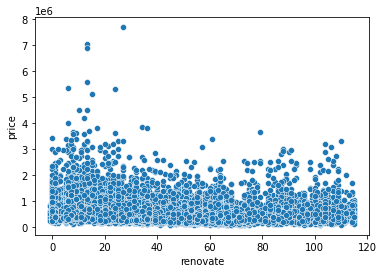

In [66]:
#renovate
sns.scatterplot(df2['renovate'],df2['price'])

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

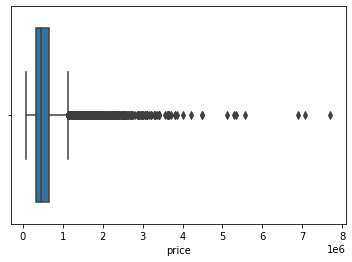

In [67]:
#price
sns.boxplot(df2['price'])

In [68]:
df2[df2['price']>6000000]
#prices are kind of justified because of large living space in all three compared to 5 and 6 bedroom places

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,renovate,location
3910,7060000.0,5,4.50,10040,37325,2.0,1,2,3.0,11,7680,2360,Very Posh,3930,25449,13,0.860405
7245,7700000.0,6,8.00,12050,27600,2.5,0,3,4.0,13,8570,3480,Very Posh,3940,8800,27,0.771607
9245,6890000.0,6,7.75,9890,31374,2.0,0,4,3.0,13,8860,1030,Very Posh,4540,42730,13,0.845062


In [69]:
demo=df2[df2['bedrooms']==5]
demo.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,renovate,location
count,1.585000e+03,1585.0,1585.000000,1585.000000,1.585000e+03,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,7.858211e+05,5.0,2.780442,3050.668770,1.684832e+04,1.582019,0.011356,0.409464,3.450158,8.280757,2412.242271,638.426498,2446.273186,13138.523028,37.304101,0.912910
std,5.900786e+05,0.0,0.830618,1063.702424,4.267314e+04,0.492262,0.105993,0.989611,0.662898,1.337131,1056.245150,605.068169,811.585192,20944.106620,29.125701,0.129555
min,1.330000e+05,5.0,1.000000,1120.000000,1.989000e+03,1.000000,0.000000,0.000000,1.500000,5.000000,760.000000,0.000000,460.000000,1209.000000,-1.000000,0.648993
25%,4.380000e+05,5.0,2.250000,2320.000000,6.282000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1830.000000,6035.000000,11.000000,0.812396
50%,6.200000e+05,5.0,2.750000,2870.000000,8.936000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2190.000000,700.000000,2290.000000,8550.000000,36.000000,0.908273
75%,9.150000e+05,5.0,3.250000,3550.000000,1.325200e+04,2.000000,0.000000,0.000000,4.000000,9.000000,3050.000000,1090.000000,2940.000000,12000.000000,53.000000,0.993863
max,7.060000e+06,5.0,6.500000,10040.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,13.000000,8020.000000,3260.000000,6110.000000,256803.000000,115.000000,1.381128


In [70]:
demo=df2[df2['bedrooms']==6]
demo.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,renovate,location
count,2.650000e+02,265.0,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,8.333442e+05,6.0,3.088679,3310.758491,18839.203774,1.609434,0.015094,0.558491,3.484906,8.113208,2510.086792,800.671698,2296.860377,14937.879245,46.905660,0.875059
std,8.082964e+05,0.0,1.057380,1297.039602,38521.376843,0.537694,0.122159,1.179598,0.683794,1.377035,1121.007148,677.595695,812.913834,34530.065359,29.916971,0.123612
min,1.750000e+05,6.0,1.000000,1370.000000,2370.000000,1.000000,0.000000,0.000000,1.500000,5.000000,900.000000,0.000000,900.000000,1099.000000,0.000000,0.661956
25%,4.350000e+05,6.0,2.500000,2540.000000,6015.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1680.000000,0.000000,1720.000000,5450.000000,26.000000,0.769076
50%,6.500000e+05,6.0,3.000000,2980.000000,8732.000000,2.000000,0.000000,0.000000,3.000000,8.000000,2350.000000,900.000000,2120.000000,8240.000000,45.000000,0.864642
75%,9.000000e+05,6.0,3.750000,3670.000000,14040.000000,2.000000,0.000000,0.000000,4.000000,9.000000,3050.000000,1270.000000,2680.000000,11200.000000,60.000000,0.964718
max,7.700000e+06,6.0,8.000000,12050.000000,248600.000000,3.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,3480.000000,5790.000000,311610.000000,115.000000,1.309288


### BIVARIATE ANALYSIS

In [71]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,renovate,location
price,1.000000,0.316120,0.524427,0.700936,0.090541,0.257137,0.262740,0.395221,0.037750,0.668083,0.604870,0.318719,0.584982,0.081348,-0.104430,-0.137934
bedrooms,0.316120,1.000000,0.528460,0.594604,0.032283,0.183266,-0.007947,0.081178,0.025123,0.367206,0.492907,0.308246,0.405658,0.030107,-0.171898,0.116823
bathrooms,0.524427,0.528460,1.000000,0.754346,0.091640,0.502245,0.060869,0.185125,-0.123978,0.665086,0.685094,0.279012,0.569062,0.086898,-0.538378,0.171196
sqft_living,0.700936,0.594604,0.754346,1.000000,0.177737,0.353480,0.100430,0.281120,-0.057408,0.763363,0.876347,0.429580,0.757418,0.182261,-0.343421,0.172843
sqft_lot,0.090541,0.032283,0.091640,0.177737,1.000000,-0.004991,0.022748,0.069720,-0.013395,0.119694,0.188896,0.014230,0.146553,0.719542,-0.057368,0.240521
floors,0.257137,0.183266,0.502245,0.353480,-0.004991,1.000000,0.024103,0.027335,-0.260861,0.458111,0.522984,-0.247872,0.278817,-0.011792,-0.505174,0.074194
waterfront,0.262740,-0.007947,0.060869,0.100430,0.022748,0.024103,1.000000,0.402357,0.017190,0.081293,0.070515,0.075944,0.085929,0.031211,0.001465,-0.025069
view,0.395221,0.081178,0.185125,0.281120,0.069720,0.027335,0.402357,1.000000,0.046063,0.249363,0.164647,0.273952,0.278326,0.069517,0.020488,-0.070612
condition,0.037750,0.025123,-0.123978,-0.057408,-0.013395,-0.260861,0.017190,0.046063,1.000000,-0.144599,-0.156623,0.174650,-0.090908,-0.005499,0.391841,-0.084040
grade,0.668083,0.367206,0.665086,0.763363,0.119694,0.458111,0.081293,0.249363,-0.144599,1.000000,0.756212,0.164371,0.713033,0.120654,-0.460264,0.108280


In [72]:
#both sqft_lot and sqft_lot15 are very less correlated to price hence they'll be dropped
df2.drop(['sqft_lot','sqft_lot15'],axis=1,inplace=True)

In [73]:
#renovate and location too are poorly correlated with price hence be dropped
df2.drop(['renovate','location'],axis=1,inplace=True)

In [74]:
#high correlation between sqft_living and sqft_living15, drop sqft_living15 as it has less correlation with price
df2.drop(['sqft_living15'],axis=1,inplace=True)

In [75]:
#high correlation between sqft_living and sqft_above, from business point of view drop sqft_above
df2.drop(['sqft_above'],axis=1,inplace=True)

In [76]:
#sqft_living highly correlated with bathroom and grade and drop
#df2.drop(['sqft_living'], axis=1, inplace=True)
#since bathroom variable has less unique values hence correlation with sqft_living is high but not really - check

In [77]:
#plot color scaled correlation matrix
corr=df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement
price,1.000000,0.316120,0.524427,0.700936,0.257137,0.262740,0.395221,0.037750,0.668083,0.318719
bedrooms,0.316120,1.000000,0.528460,0.594604,0.183266,-0.007947,0.081178,0.025123,0.367206,0.308246
bathrooms,0.524427,0.528460,1.000000,0.754346,0.502245,0.060869,0.185125,-0.123978,0.665086,0.279012
sqft_living,0.700936,0.594604,0.754346,1.000000,0.353480,0.100430,0.281120,-0.057408,0.763363,0.429580
floors,0.257137,0.183266,0.502245,0.353480,1.000000,0.024103,0.027335,-0.260861,0.458111,-0.247872
waterfront,0.262740,-0.007947,0.060869,0.100430,0.024103,1.000000,0.402357,0.017190,0.081293,0.075944
view,0.395221,0.081178,0.185125,0.281120,0.027335,0.402357,1.000000,0.046063,0.249363,0.273952
condition,0.037750,0.025123,-0.123978,-0.057408,-0.260861,0.017190,0.046063,1.000000,-0.144599,0.174650
grade,0.668083,0.367206,0.665086,0.763363,0.458111,0.081293,0.249363,-0.144599,1.000000,0.164371
sqft_basement,0.318719,0.308246,0.279012,0.429580,-0.247872,0.075944,0.273952,0.174650,0.164371,1.000000


In [78]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,3.0,7,0,Average
1,538000.0,3,2.25,2570,2.0,0,0,3.0,7,400,Good
2,180000.0,2,1.00,770,1.0,0,0,3.0,6,0,Good
3,604000.0,4,3.00,1960,1.0,0,0,5.0,7,910,Posh
4,510000.0,3,2.00,1680,1.0,0,0,3.0,8,0,Very Posh


In [79]:
#creating dummy variables for zipcode
df2=pd.get_dummies(df2, columns=['zipcode'])
df2.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode_Average,zipcode_Good,zipcode_Posh,zipcode_Very Posh
0,221900.0,3,1.00,1180,1.0,0,0,3.0,7,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,3.0,7,400,0,1,0,0
2,180000.0,2,1.00,770,1.0,0,0,3.0,6,0,0,1,0,0
3,604000.0,4,3.00,1960,1.0,0,0,5.0,7,910,0,0,1,0
4,510000.0,3,2.00,1680,1.0,0,0,3.0,8,0,0,0,0,1


In [80]:
df2.drop(['zipcode_Average'],axis=1,inplace=True)
df2.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode_Good,zipcode_Posh,zipcode_Very Posh
0,221900.0,3,1.00,1180,1.0,0,0,3.0,7,0,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,3.0,7,400,1,0,0
2,180000.0,2,1.00,770,1.0,0,0,3.0,6,0,1,0,0
3,604000.0,4,3.00,1960,1.0,0,0,5.0,7,910,0,1,0
4,510000.0,3,2.00,1680,1.0,0,0,3.0,8,0,0,0,1


In [81]:
import math

df2['price']=np.log(df2['price'])
df2.head()
#df2.info()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode_Good,zipcode_Posh,zipcode_Very Posh
0,12.309982,3,1.00,1180,1.0,0,0,3.0,7,0,0,0,0
1,13.195614,3,2.25,2570,2.0,0,0,3.0,7,400,1,0,0
2,12.100712,2,1.00,770,1.0,0,0,3.0,6,0,1,0,0
3,13.311329,4,3.00,1960,1.0,0,0,5.0,7,910,0,1,0
4,13.142166,3,2.00,1680,1.0,0,0,3.0,8,0,0,0,1


In [82]:
from sklearn.model_selection import train_test_split

df2_train, df2_test = train_test_split(df2,train_size=0.7,random_state=100)
df2_train
df2_test

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode_Good,zipcode_Posh,zipcode_Very Posh
2330,12.660328,4,2.75,2200,1.0,0,0,3.0,8,340,0,0,0
5545,12.332705,3,1.00,1280,1.0,0,0,5.0,6,0,0,0,0
9620,12.793859,4,2.00,1650,1.0,0,0,4.0,7,790,1,0,0
16610,13.329378,5,3.50,2950,2.0,0,3,3.0,9,600,0,1,0
17418,12.350173,3,1.75,1220,1.0,0,0,3.0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,13.017003,2,1.50,1450,1.0,0,0,3.0,7,630,0,1,0
16739,12.533576,3,2.50,1690,2.0,0,0,3.0,8,0,0,0,0
11219,12.594731,4,3.00,2120,2.0,0,0,3.0,8,0,0,1,0
15705,13.699987,4,2.50,3420,2.0,0,0,3.0,9,0,0,1,0


### Why scale data points after splitting and not before?

Testing data points represent real-world data. Feature normalization (or data standardization) of the explanatory (or predictor) variables is a technique used to center and normalise the data by subtracting the mean and dividing by the variance. If you take the mean and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance).
Therefore, we should perform feature normalisation over the training data.

In [83]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Normalizer

scaler=MinMaxScaler()
#scaler=StandardScaler()
#scaler=Normalizer()

In [84]:
cols=df2_train.columns
print(cols)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'zipcode_Good',
       'zipcode_Posh', 'zipcode_Very Posh'],
      dtype='object')


In [85]:
df2_train[cols] = scaler.fit_transform(df2_train[cols])
df2_test[cols] = scaler.transform(df2_test[cols])

<ipython-input-85-27f0c2f5c71c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_train[cols] = scaler.fit_transform(df2_train[cols])
C:\Users\kriti\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-85-27f0c2f5c71c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [86]:
X_train=df2_train.drop('price', axis=1)
y_train=df2_train['price']
y_train

18156    0.363997
10407    0.247001
4357     0.444273
21028    0.341926
7942     0.315405
           ...   
16456    0.297291
79       0.483975
12228    0.326903
14276    0.355980
5684     0.555509
Name: price, Length: 14991, dtype: float64

In [87]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     5312.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:16:32   Log-Likelihood:                 23685.
No. Observations:               14991   AIC:                        -4.734e+04
Df Residuals:                   14978   BIC:                        -4.724e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0791      0.00

In [88]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

features=[]
features=X_train.columns
#print(features)
rfecv=RFECV(estimator=LinearRegression(), step=1, cv=5)
rfecv=rfecv.fit(X_train,y_train)
print("Optimal number of features",rfecv.n_features_)
print("Best features",X_train.columns[rfecv.support_])

Optimal number of features 10
Best features Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'zipcode_Good', 'zipcode_Posh', 'zipcode_Very Posh'],
      dtype='object')


In [89]:
rfecv.grid_scores_

array([0.47956062, 0.55319082, 0.56329764, 0.63957006, 0.74972156,
       0.76221776, 0.80197945, 0.80883545, 0.80895377, 0.809018  ,
       0.80897605, 0.80899318, 0.80899318])

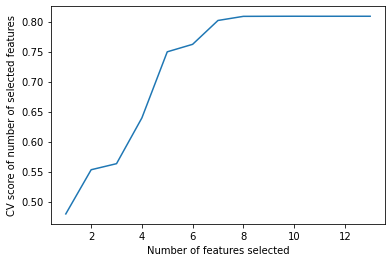

In [90]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("CV score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [91]:
X_train.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'zipcode_Good',
       'zipcode_Posh', 'zipcode_Very Posh'],
      dtype='object')

In [92]:
X_test=df2_test.drop('price',axis=1)
y_test=df2_test['price']
X_test

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode_Good,zipcode_Posh,zipcode_Very Posh
2330,0.3,0.300000,0.155955,0.0,0.0,0.00,0.428571,0.5,0.097143,0.0,0.0,0.0
5545,0.2,0.066667,0.077121,0.0,0.0,0.00,1.000000,0.3,0.000000,0.0,0.0,0.0
9620,0.3,0.200000,0.108826,0.0,0.0,0.00,0.714286,0.4,0.225714,1.0,0.0,0.0
16610,0.4,0.400000,0.220223,0.4,0.0,0.75,0.428571,0.6,0.171429,0.0,1.0,0.0
17418,0.2,0.166667,0.071979,0.0,0.0,0.00,0.428571,0.4,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4401,0.1,0.133333,0.091688,0.0,0.0,0.00,0.428571,0.4,0.180000,0.0,1.0,0.0
16739,0.2,0.266667,0.112254,0.4,0.0,0.00,0.428571,0.5,0.000000,0.0,0.0,0.0
11219,0.3,0.333333,0.149100,0.4,0.0,0.00,0.428571,0.5,0.000000,0.0,1.0,0.0
15705,0.3,0.266667,0.260497,0.4,0.0,0.00,0.428571,0.6,0.000000,0.0,1.0,0.0


In [93]:
X_test.shape

(6425, 12)

In [94]:
rfe=RFE(estimator=LinearRegression(), n_features_to_select=9)
rfe.fit(X_train,y_train)

X_train.columns[rfe.support_]
X_final=X_train[X_train.columns[rfe.support_]]
#print(X_final)
lmbest=sm.OLS(y_train,sm.add_constant(X_final))
results=lmbest.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     7079.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:16:35   Log-Likelihood:                 23680.
No. Observations:               14991   AIC:                        -4.734e+04
Df Residuals:                   14981   BIC:                        -4.726e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0790      0.003     31.450      0.000       0.074       0.084
bathrooms             0.0209      0.006      3.359      0.001       0.009       0.033
sqft_living           0.4955      0.010     51.563      0.000       0.477       0.514
waterfront            0.0877      0.005     17.174      0.000       0.078       0.098
view                  0.0692      0.002     28.609      0.000       0.064       0.074
condition             0.0522      0.002     23.429      0.000       0.048       0.057
grade                 0.2419      0.006     41.638      0.000       0.231       0.253
zipcode_Good          0.0667      0.001     56.529      0.000       0.064       0.069
zipcode_Posh          0.1227      0.001    107.265      0.000       0.120       0.125
zipcode_Very Posh     0.1504      0.001    119.408      0.000       0.148       0.153
==============================================================================
Omnibus:                      437.275   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1025.686
Skew:                           0.130   Prob(JB):                    1.88e-223
Kurtosis:                       4.255   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_final.columns

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade',
       'zipcode_Good', 'zipcode_Posh', 'zipcode_Very Posh'],
      dtype='object')

In [96]:
X_test.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'zipcode_Good', 'zipcode_Posh',
       'zipcode_Very Posh'],
      dtype='object')

In [97]:
X_test.drop(['bedrooms','floors','sqft_basement'],axis=1,inplace=True)
X_test=sm.add_constant(X_test)

In [98]:
X_test.columns

Index(['const', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition',
       'grade', 'zipcode_Good', 'zipcode_Posh', 'zipcode_Very Posh'],
      dtype='object')

In [99]:
predictions=results.predict(X_test)
predictions

2330     0.305879
5545     0.243389
9620     0.337827
16610    0.538666
17418    0.237284
           ...   
4401     0.369089
16739    0.283527
11219    0.425915
15705    0.503914
8943     0.452777
Length: 6425, dtype: float64

### Residual Analysis 

In [100]:
#RESIDUALS
residuals=results.resid
residuals.describe()

count    1.499100e+04
mean     1.599792e-16
std      4.986005e-02
min     -3.085083e-01
25%     -3.139591e-02
50%     -1.418825e-03
75%      2.961130e-02
max      2.773402e-01
dtype: float64

(array([4.000e+00, 9.000e+00, 8.600e+01, 7.370e+02, 4.833e+03, 6.673e+03,
        2.241e+03, 3.560e+02, 4.600e+01, 6.000e+00]),
 array([-0.30850832, -0.24992346, -0.19133861, -0.13275376, -0.07416891,
        -0.01558405,  0.0430008 ,  0.10158565,  0.1601705 ,  0.21875536,
         0.27734021]),
 <BarContainer object of 10 artists>)

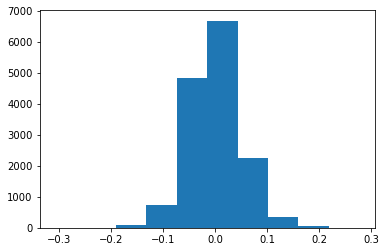

In [101]:
plt.hist(residuals)

In [102]:
corr = y_train.corr(results.fittedvalues)
corr
#we have high correlation between actual points and fitted values which is good

0.8997881393683603

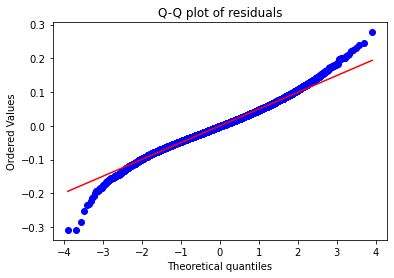

In [103]:
#Q-Q PLOT to check normality of residuals
from scipy import stats

#If the points lie close to the Q-Q Line, then it is reasonable to assume that the data is normally distributed.
stats.probplot( residuals, dist='norm', plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


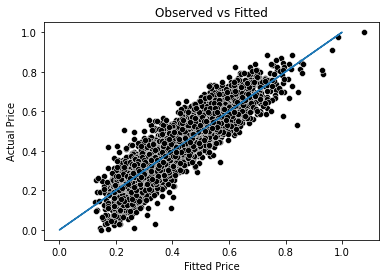

In [104]:
#Scatter plot for fitted vs actual values to check goodness of fit of a model 

#A scatter plot of Fitted vs. Actual values along with a line having slope 1 
#can be used to assess the goodness of fit of a model. A good fit willimply that the points lie close to the reference line.
import seaborn as sns

sns.scatterplot(results.fittedvalues, y_train, color ='black')
plt.xlabel('Fitted Price')
plt.ylabel('Actual Price')
plt.plot(y_train,y_train)
plt.title('Observed vs Fitted')
plt.show()

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


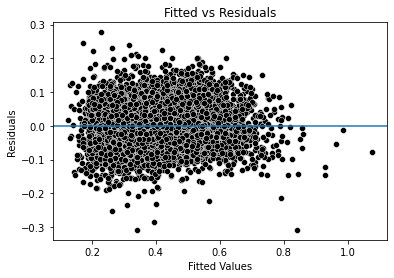

In [105]:
#Scatter plot for residuals vs fitted to check heteroscedasticity

#this plot is made to check for the presence of heteroscedasticity. As long as the points seem to scatter randomly, it is
#safe to assume that the errors are homoscedastic.
sns.scatterplot(results.fittedvalues, residuals, color = 'black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0)
plt.title('Fitted vs Residuals')
plt.show()

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


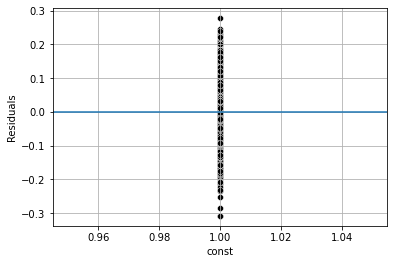

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


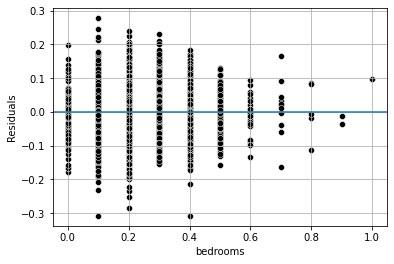

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


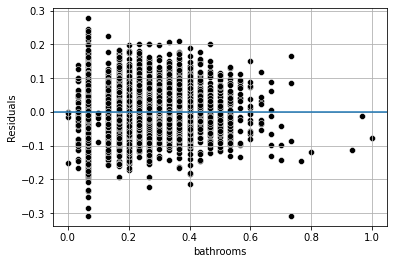

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


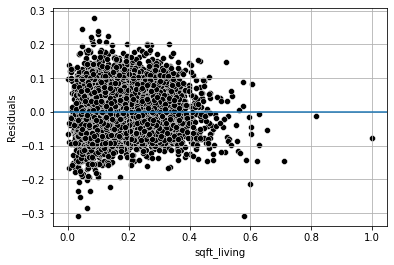

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


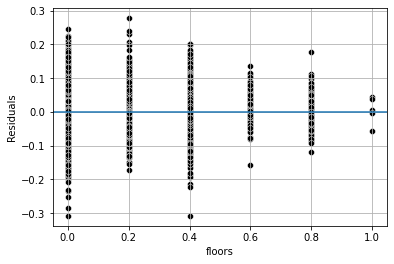

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


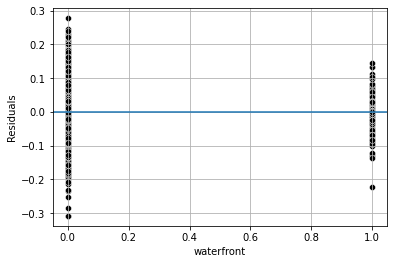

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


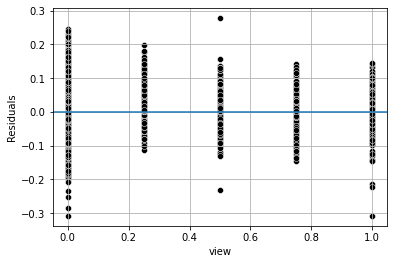

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


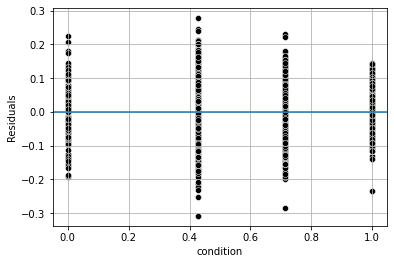

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


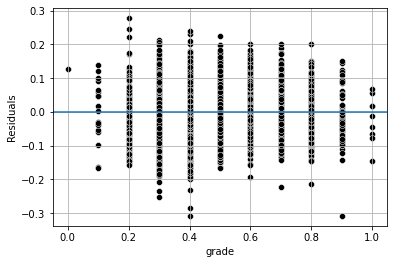

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


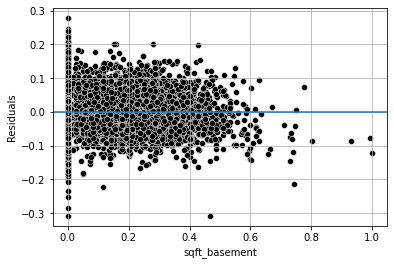

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


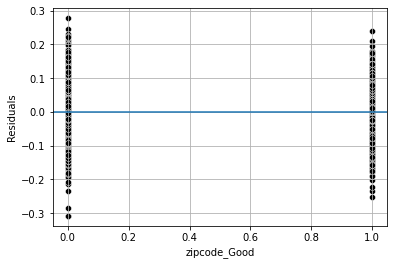

C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


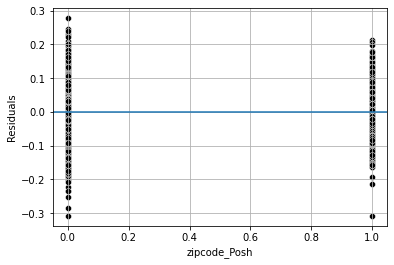

In [106]:
#residuals plotted with predicting variables

X_train.head()
for columns in X_train.columns[:-1]:
    sns.scatterplot(X_train[columns],residuals, color = 'black')
    plt.xlabel(columns)
    plt.ylabel('Residuals')
    plt.axhline(0)
    plt.grid(True)
    plt.show()

In [107]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data['Features']=X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) 
                   for i in range(len(X_train.columns))]

print(vif_data)
#vif_data.shape

             Features        VIF
0               const  44.148214
1            bedrooms   1.711104
2           bathrooms   2.922404
3         sqft_living   4.683228
4              floors   1.865088
5          waterfront   1.201779
6                view   1.360005
7           condition   1.107703
8               grade   3.144103
9       sqft_basement   1.754149
10       zipcode_Good   1.534153
11       zipcode_Posh   1.656912
12  zipcode_Very Posh   1.757164


C:\Users\kriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


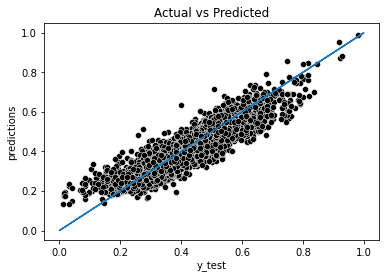

In [108]:

sns.scatterplot(y_test, predictions, color ='black')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.plot(y_train,y_train)
plt.title('Actual vs Predicted')
plt.show()